In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.tree import export_graphviz
import graphviz


In [2]:
df = pd.read_csv(r'/home/drack/ML/Mushroom Classification/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:

df.shape

(8124, 23)

In [6]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [7]:
df['class'].unique()

array(['p', 'e'], dtype=object)

<ipython-input-8-a4027f2189dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, alpha=0.8, palette = "prism")


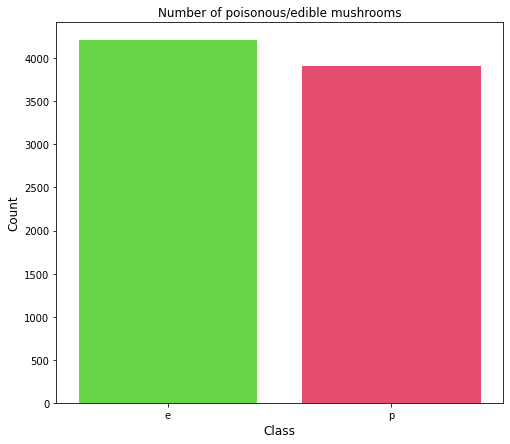

In [8]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette = "prism")
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Class', fontsize = 12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

# Data Manipulation
  ##### Categoical Data to Numers --> Label Encoder
  ##### Change 'object' types to 'categorical' type first
  

In [9]:
df= df.astype('category')

In [10]:
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [11]:
lblEncdr = LabelEncoder()
for col in df.columns:
    df[col] = lblEncdr.fit_transform(df[col])

In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


veil-type is 0 and not contributing to data so drop it

In [14]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int64

In [15]:
df2= df.copy()
df2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [16]:
df2['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int64

In [17]:
df2= df2.drop(["veil-type"], axis= 1) #drop col as it's 0 seen in describe function

Violin-Plot: shows the distribution of a Classification characteristics. 

In [18]:
# df_div = pd.melt(df, "class", var_name="Characteristics")
# fig, ax = plt.subplots(figsize=(16,6))
# p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
# df_no_class = df.drop(["class"],axis = 1)
# p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
# #plt.savefig("violinplot.png", format='png', dpi=900, bbox_inches='tight')

# Co-relation b/t variables

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'class'),
  Text(0, 1.5, 'cap-shape'),
  Text(0, 2.5, 'cap-surface'),
  Text(0, 3.5, 'cap-color'),
  Text(0, 4.5, 'bruises'),
  Text(0, 5.5, 'odor'),
  Text(0, 6.5, 'gill-attachment'),
  Text(0, 7.5, 'gill-spacing'),
  Text(0, 8.5, 'gill-size'),
  Text(0, 9.5, 'gill-color'),
  Text(0, 10.5, 'stalk-shape'),
  Text(0, 11.5, 'stalk-root'),
  Text(0, 12.5, 'stalk-surface-above-ring'),
  Text(0, 13.5, 'stalk-surface-below-ring'),
  Text(0, 14.5, 'stalk-color-above-ring'),
  Text(0, 15.5, 'stalk-color-below-ring'),
  Text(0, 16.5, 'veil-color'),
  Text(0, 17.5, 'ring-number'),
  Text(0, 18.5, 'ring-type'),
  Text(0, 19.5, 'spore-print-color'),
  Text(0, 20.5, 'population'),
  Text(0, 21.5, 'habitat')])

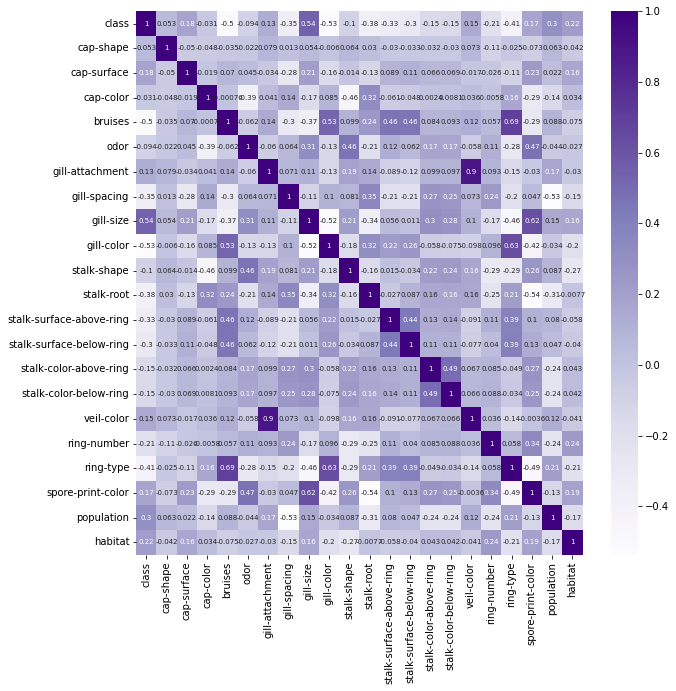

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(), cmap= 'Purples', annot= True, annot_kws={"size": 7})
plt.yticks(rotation = 0)

#### Usually, the least correlating variable is the most important one for classification. --> "gill-color" has -0.53 co-relation

In [20]:
df[['gill-color', 'class']].groupby(['gill-color'], as_index= False)\
    .mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


#### Gehrai se "gill-color" ko observe

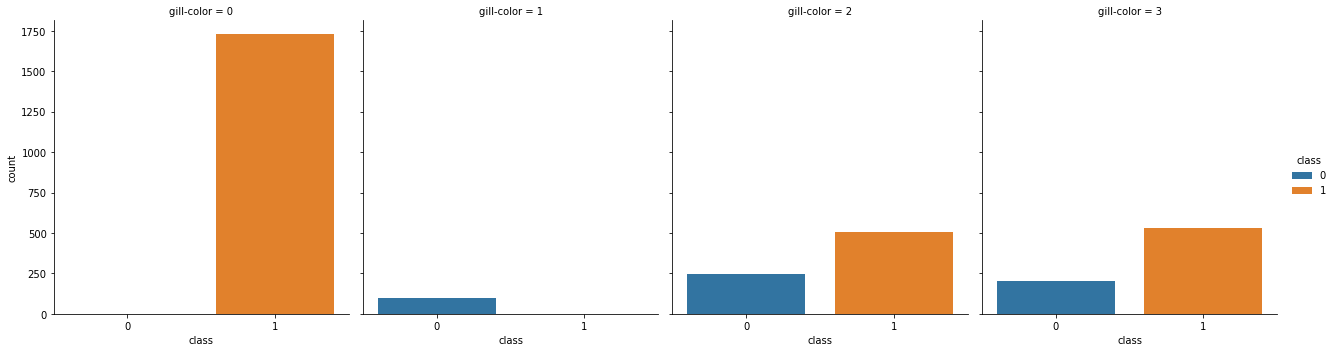

In [21]:
new_var= df2[['class', 'gill-color']]
new_var= new_var[new_var['gill-color']<=3.5]
sns.catplot(x='class', col='gill-color', data=new_var,hue='class' ,kind= 'count',aspect= .9, col_wrap= 4)

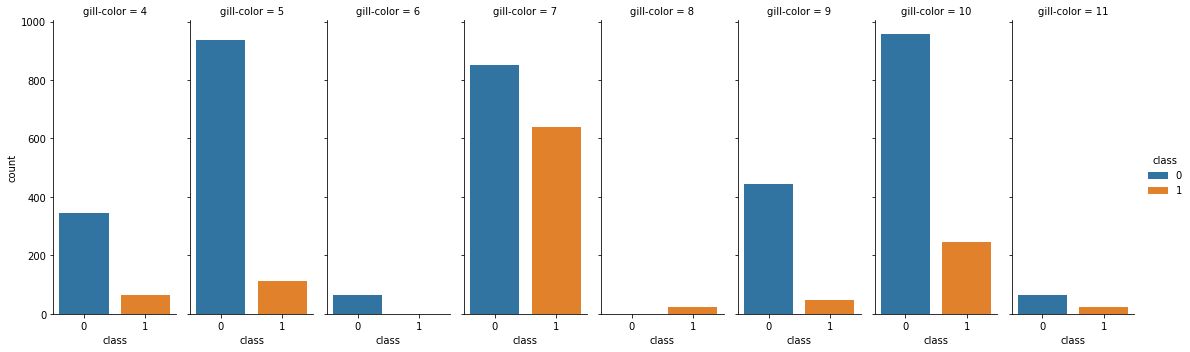

In [22]:
new_var= df2[['class', 'gill-color']]
new_var= new_var[new_var['gill-color']>3.5]

sns.catplot(x='class', data=new_var, col='gill-color', kind= 'count', aspect= .4, hue= 'class', col_wrap= 8)

## Preparing the Data
##### Setting X and Y axis and splitting the data into train and test respectively

In [23]:
X= df2.drop(['class'], axis = 1)
y= df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.1)


# Classification Methods
 
 ### 1. Decision Tree Classification

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

## Feature Importance

#### By all the methods examined before, the feature that is most important is "gill-color"

In [25]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance) #ascending here
      ## np.argsort--> sorts and returns indexs of how it sorted
## it will sort the array and display the indexs of how they are sorted



In [26]:
print("Lists without sort-->", features_list,"\n")
print("Feature importance of lists-->",feature_importance,"\n")
print("Feature Names on Sort Basis-->",features_list[sorted_idx],"\n")
print("Feature importance sort index-->",sorted_idx,"\n")

Lists without sort--> ['cap-shape' 'cap-surface' 'cap-color' 'bruises' 'odor' 'gill-attachment'
 'gill-spacing' 'gill-size' 'gill-color' 'stalk-shape' 'stalk-root'
 'stalk-surface-above-ring' 'stalk-surface-below-ring'
 'stalk-color-above-ring' 'stalk-color-below-ring' 'veil-color'
 'ring-number' 'ring-type' 'spore-print-color' 'population' 'habitat'] 

Feature importance of lists--> [0.         0.         0.00322417 0.02740962 0.         0.
 0.         0.12056218 0.33981815 0.02550464 0.04697584 0.00406585
 0.00198095 0.         0.         0.         0.01928358 0.
 0.21110994 0.17513573 0.02492935] 

Feature Names on Sort Basis--> ['cap-shape' 'cap-surface' 'ring-type' 'odor' 'gill-attachment'
 'gill-spacing' 'veil-color' 'stalk-color-below-ring'
 'stalk-color-above-ring' 'stalk-surface-below-ring' 'cap-color'
 'stalk-surface-above-ring' 'ring-number' 'habitat' 'stalk-shape'
 'bruises' 'stalk-root' 'gill-size' 'population' 'spore-print-color'
 'gill-color'] 

Feature importance sort i

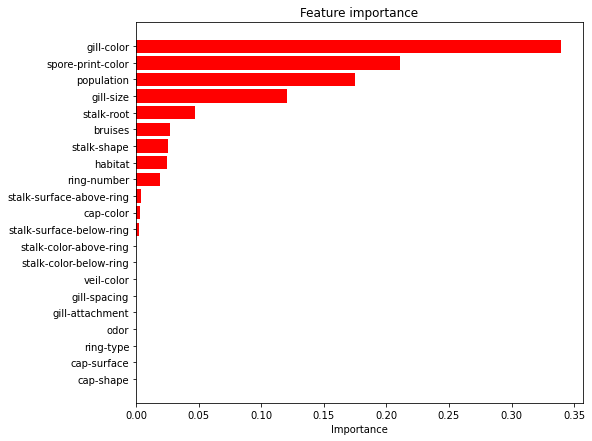

In [27]:

plt.figure(figsize= (8,7))
# plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align = "center", color = 'red')
plt.barh(y=range(len(sorted_idx)), width=feature_importance[sorted_idx], align='center', color="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()


### Predicting and estimating the result

In [28]:
y_pred_dt= dt.predict(X_test)

In [29]:
print("decision tress classifier report:\n\n", classification_report(y_test, y_pred_dt))

decision tress classifier report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [30]:
print("test accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

test accuracy: 100.0%


### Confusion Matrix for Decision Tree Classifier

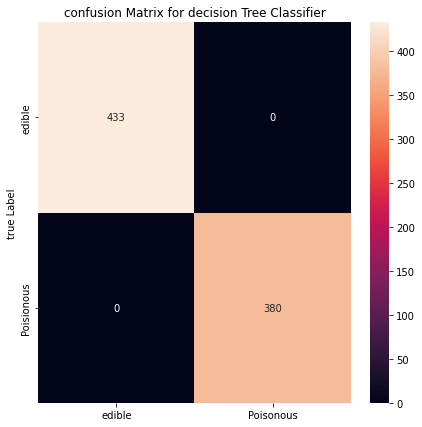

In [31]:
cm = confusion_matrix(y_test, y_pred_dt)

x_axis_labels = ["edible", "Poisonous"]
y_axis_label= ["edible", "Poisionous"]

f,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True, ax= ax, fmt=".0f",xticklabels = x_axis_labels, yticklabels=y_axis_label)
plt.ylabel("true Label")
plt.title("confusion Matrix for decision Tree Classifier")
plt.show()

### 2.Logistic regression classification 

In [32]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100, 2)))

Test Accuracy: 95.08%


/home/drack/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
y_pred_lr= lr.predict(X_test)
print("Logistic Regression Classifier Reprt:\n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier Reprt:

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.94      0.96      0.95       380

    accuracy                           0.95       813
   macro avg       0.95      0.95      0.95       813
weighted avg       0.95      0.95      0.95       813



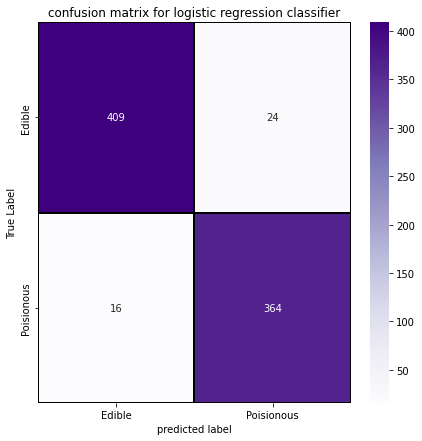

In [34]:
cm = confusion_matrix(y_test, y_pred_lr)

x_axis_labels = ['Edible', 'Poisionous']
y_axis_label = ['Edible', 'Poisionous']

f,ax= plt.subplots(figsize = (7,7))
sns.heatmap(cm, annot= True, linewidths=0.2, linecolor= 'black', fmt = ".0f", ax = ax, cmap="Purples", xticklabels = x_axis_labels, yticklabels= y_axis_label)
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix for logistic regression classifier")
plt.show()

### 3. KNN Classification

In [35]:
from sklearn.neighbors import KNeighborsClassifier

best_Kvalue = 0
best_score = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i

print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy on Best KValue: {}".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy on Best KValue: 100.0


In [36]:
# knn = KNeighborsClassifier(n_neighbors=22)
# knn.fit(X_train, y_train)
# print("Test Accuracy on Best KValue: {}".format(round(knn.score(X_train, y_train)*100,2)))

#### Classification report KNN

In [37]:
y_pred_knn = knn.predict(X_test)
print('KNN Classifer report\n\n:', classification_report(y_test, y_pred_knn))

KNN Classifer report

:               precision    recall  f1-score   support

           0       1.00      0.99      1.00       433
           1       0.99      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



#### Confusion matrix for KNN Classifier

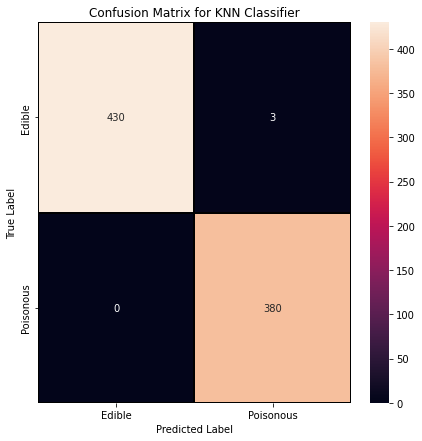

In [38]:
cm = confusion_matrix(y_test, y_pred_knn)

x_axis_labels = ['Edible', 'Poisonous']
y_axis_label = ['Edible', 'Poisonous']

f,ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths= 0.2, linecolor = "black", fmt= '0.0f', ax = ax, xticklabels=x_axis_labels, yticklabels= y_axis_label)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix for KNN Classifier")
plt.show()